In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import openpyxl
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage

#Show mols in dataframes
from rdkit.Chem import PandasTools
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
from IPython.core.display import HTML
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import DataStructs
import os
import sys
from scipy.spatial.distance import pdist, squareform

In [2]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
processed_dir = TOP +'data/processed/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'


In [3]:
import glob

In [5]:
files = []
for f in glob.glob(raw_dir+'Mutagenicity*.xlsx'):
    files.append(f)


In [14]:
opera_file = pd.read_csv(processed_dir+'TSCA_JUL22_v3_QSAR-ready_smi.smi', sep = '\t', names = ['QSAR_READY_SMILES', 'dtxsid'])

In [68]:
opera_summary = pd.read_csv(processed_dir+'TSCA_JUL22_v3_Summary_file.csv')

In [70]:
opera_summary.head()

,RowID,Molecule name,Original_SMILES,Number of connected components,Canonical_QSARr,InChI_Code_QSARr,InChI Key_QSARr,Salt_Solvent,Salt_Solvent_ID
0,1,DTXSID3060164,C1=CC=CC=C1C(C1C=CC=CC=1)C1C=CC=CC=1,1,C1=CC=CC=C1C(C1C=CC=CC=1)C1C=CC=CC=1,InChI=1S/C19H16/c1-4-10-16(11-5-1)19(17-12-6-2...,AAAQKTZKLRYKHR-UHFFFAOYSA-N,NaN,0
1,2,DTXSID7060837,ICCCI,1,ICCCI,InChI=1S/C3H6I2/c4-2-1-3-5/h1-3H2,AAAXMNYUNVCMCJ-UHFFFAOYSA-N,NaN,0
2,3,DTXSID9025879,OC(=O)C=CC1C=CC(C=CC(O)=O)=CC=1,1,OC(=O)C=CC1C=CC(C=CC(O)=O)=CC=1,InChI=1S/C12H10O4/c13-11(14)7-5-9-1-2-10(4-3-9...,AAFXQFIGKBLKMC-UHFFFAOYSA-N,NaN,0
3,4,DTXSID2026282,O=C(NC1=CC2=C(NC3C4=C(C=CC2=3)C(=O)C2C(=CC=CC=...,1,O=C(NC1=CC2=C(NC3C4=C(C=CC2=3)C(=O)C2C(=CC=CC=...,InChI=1S/C42H23N3O6/c46-37-24-14-7-8-15-25(24)...,AAKMSGQPNUGLAZ-UHFFFAOYSA-N,NaN,0
4,5,DTXSID4052188,CC1(C)COC(C)(OC1)C1C=CC=CC=1,1,CC1(C)COC(C)(OC1)C1C=CC=CC=1,InChI=1S/C13H18O2/c1-12(2)9-14-13(315-10-12)11...,AALXTPRRKXUUOM-UHFFFAOYSA-N,NaN,0


In [17]:
import re

In [50]:
def atoi(text):
    return int(text) if text.isdigit() else text

In [51]:
def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)',text) ]

In [52]:
files = [e.split('/')[-1] for e in files]

In [53]:
[natural_keys(e) for e in files]


[['Mutagenicity_Consensus', 11, '.xlsx'],
 ['Mutagenicity_Consensus', 12, '.xlsx'],
 ['Mutagenicity_Consensus', 6, '.xlsx'],
 ['Mutagenicity_Consensus.xlsx'],
 ['Mutagenicity_Consensus', 14, '.xlsx'],
 ['Mutagenicity_Consensus', 3, '.xlsx'],
 ['Mutagenicity_Consensus', 9, '.xlsx'],
 ['Mutagenicity_Consensus', 13, '.xlsx'],
 ['Mutagenicity_Consensus', 2, '.xlsx'],
 ['Mutagenicity_Consensus', 10, '.xlsx'],
 ['Mutagenicity_Consensus', 8, '.xlsx'],
 ['Mutagenicity_Consensus', 7, '.xlsx'],
 ['Mutagenicity_Consensus', 4, '.xlsx'],
 ['Mutagenicity_Consensus', 5, '.xlsx'],
 ['Mutagenicity_Consensustsca', 1, '.xlsx']]

In [54]:
files.sort(key = natural_keys)

In [58]:
files = [files[-2]] +files[:-2]

In [59]:
def prep(f):
    df = pd.read_excel(raw_dir+f)
    return df

In [63]:
mydfs = []
for f in files:
    mydfs.append(prep(f))

/home/grace/anaconda3/envs/pfas_dap/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [65]:
test_mut = pd.concat(mydfs)

In [66]:
test_mut.shape

(12796, 10)

In [108]:
files_dev = []
for f in glob.glob(raw_dir+'Developmental*.xlsx'):
    files_dev.append(f)

In [110]:
files_dev
files_dev = [e.split('/')[-1] for e in files_dev]
files_dev

['Developmental_Toxicity_Consensus8.xlsx',
 'Developmental_Toxicity_Consensus9.xlsx',
 'Developmental_Toxicity_Consensus7.xlsx',
 'Developmental_Toxicity_Consensus5.xlsx',
 'Developmental_Toxicity_Consensus4.xlsx',
 'Developmental_Toxicity_Consensus3.xlsx',
 'Developmental_Toxicity_Consensus12.xlsx',
 'Developmental_Toxicity_Consensus14.xlsx',
 'Developmental_Toxicity_Consensus11.xlsx',
 'Developmental_Toxicity_Consensus2.xlsx',
 'Developmental_Toxicity_Consensus10.xlsx',
 'Developmental_Toxicity_Consensus1.xlsx',
 'Developmental_Toxicity_Consensus6.xlsx',
 'Developmental_Toxicity_Consensus13.xlsx']

In [111]:
files_dev.sort(key = natural_keys)

In [113]:
files_dev
mydfs_dev = []
for f in files_dev:
    mydfs_dev.append(prep(f))

/home/grace/anaconda3/envs/pfas_dap/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [114]:
test_dev = pd.concat(mydfs_dev)

In [80]:
def smi_inchi(x):
    mol = Chem.MolFromSmiles(x)
    clean_smi = Chem.MolToSmiles(mol)
    clean_mol = Chem.MolFromSmiles(clean_smi)
    inchi =     Chem.MolToInchi(clean_mol)
    inchi_key = Chem.InchiToInchiKey(inchi)
    return inchi_key

In [81]:
inchi_keys = {}
errors = []
for k,v in zip(test_mut['Query'], test_mut['SmilesRan']):
    try:
        X = smi_inchi(v)
    except Exception as error:
        errors.append(error)
    else:
        inchi_keys[k] = X

RDKit WARNING: [13:54:30] WARNING: Omitted undefined stereo
RDKit WARNING: [13:54:30] WARNING: Omitted undefined stereo
RDKit WARNING: [13:54:30] WARNING: Charges were rearranged
RDKit WARNING: [13:54:30] WARNING: Omitted undefined stereo
RDKit WARNING: [13:54:30] WARNING: Omitted undefined stereo
RDKit WARNING: [13:54:30] WARNING: Omitted undefined stereo
RDKit WARNING: [13:54:30] WARNING: Omitted undefined stereo
RDKit WARNING: [13:54:30] WARNING: Omitted undefined stereo
RDKit WARNING: [13:54:30] WARNING: Omitted undefined stereo
RDKit WARNING: [13:54:30] WARNING: Omitted undefined stereo
RDKit WARNING: [13:54:30] WARNING: Omitted undefined stereo
RDKit WARNING: [13:54:30] WARNING: Omitted undefined stereo
RDKit WARNING: [13:54:30] WARNING: Omitted undefined stereo
RDKit WARNING: [13:54:30] WARNING: Charges were rearranged
RDKit WARNING: [13:54:30] WARNING: Omitted undefined stereo
RDKit WARNING: [13:54:30] WARNING: Omitted undefined stereo
RDKit WARNING: [13:54:30] WARNING: Charges

In [85]:
len(inchi_keys)

12393

In [115]:
inchi_keys_dev = {}
errors=[]
for k,v in zip(test_dev['Query'], test_dev['SmilesRan']):
    try:
        X = smi_inchi(v)
    except Exception as error:
        errors.append(error)
    else:
        inchi_keys_dev[k] = X

RDKit WARNING: [13:56:00] WARNING: Omitted undefined stereo
RDKit WARNING: [13:56:00] WARNING: Omitted undefined stereo
RDKit WARNING: [13:56:00] WARNING: Omitted undefined stereo
RDKit WARNING: [13:56:00] WARNING: Omitted undefined stereo
RDKit WARNING: [13:56:00] WARNING: Omitted undefined stereo
RDKit WARNING: [13:56:00] WARNING: Omitted undefined stereo
RDKit WARNING: [13:56:00] WARNING: Omitted undefined stereo
RDKit WARNING: [13:56:00] WARNING: Omitted undefined stereo
RDKit WARNING: [13:56:00] WARNING: Omitted undefined stereo
RDKit WARNING: [13:56:00] WARNING: Omitted undefined stereo
RDKit WARNING: [13:56:00] WARNING: Omitted undefined stereo
RDKit WARNING: [13:56:00] WARNING: Omitted undefined stereo
RDKit WARNING: [13:56:00] WARNING: Omitted undefined stereo
RDKit WARNING: [13:56:00] WARNING: Omitted undefined stereo
RDKit WARNING: [13:56:00] WARNING: Omitted undefined stereo
RDKit WARNING: [13:56:00] WARNING: Omitted undefined stereo
RDKit WARNING: [13:56:00] WARNING: Charg

In [90]:
test_mut = pd.merge(test_mut, pd.DataFrame(list(inchi_keys.items()), columns = ['Query', 'inchi_key']),  on = 'Query', how = 'left')

In [83]:
test_mut.shape

(12796, 10)

In [116]:
test_dev = pd.merge(test_dev, pd.DataFrame(list(inchi_keys_dev.items()), columns = ['Query', 'inchi_key']),  on = 'Query', how = 'left')

In [118]:
#test_dev

In [97]:
all_df = pd.merge(test_mut, opera_summary, left_on = 'inchi_key', right_on = 'InChI Key_QSARr', how = 'left')

In [101]:
all_df.groupby(['inchi_key']).filter(lambda x: len(x) >1)

,Index,ID,Query,SmilesRan,Error,Exp_Value,Pred_Value,Exp_Result,Pred_Result,Unnamed: 9,inchi_key,RowID,Molecule name,Original_SMILES,Number of connected components,Canonical_QSARr,InChI_Code_QSARr,InChI Key_QSARr,Salt_Solvent,Salt_Solvent_ID
118,119,443-79-8,443-79-8,O=C(O)C(N)C(C)CC,NaN,NaN,0.16,NaN,Mutagenicity Negative,NaN,AGPKZVBTJJNPAG-UHFFFAOYSA-N,129.0,DTXSID2046882,C[C@@H](CC)[C@H](N)C(O)=O,1.0,CC(CC)C(N)C(O)=O,InChI=1S/C6H13NO2/c1-3-4(2)5(7)6(8)9/h4-5H37H2...,AGPKZVBTJJNPAG-UHFFFAOYSA-N,NaN,0.0
119,119,443-79-8,443-79-8,O=C(O)C(N)C(C)CC,NaN,NaN,0.16,NaN,Mutagenicity Negative,NaN,AGPKZVBTJJNPAG-UHFFFAOYSA-N,130.0,DTXSID1047441,C[C@@H](CC)[C@H](N)C(O)=O,1.0,CC(CC)C(N)C(O)=O,InChI=1S/C6H13NO2/c1-3-4(2)5(7)6(8)9/h4-5H37H2...,AGPKZVBTJJNPAG-UHFFFAOYSA-N,NaN,0.0
120,120,443-79-8,443-79-8,O=C(O)C(N)C(C)CC,NaN,NaN,0.16,NaN,Mutagenicity Negative,NaN,AGPKZVBTJJNPAG-UHFFFAOYSA-N,129.0,DTXSID2046882,C[C@@H](CC)[C@H](N)C(O)=O,1.0,CC(CC)C(N)C(O)=O,InChI=1S/C6H13NO2/c1-3-4(2)5(7)6(8)9/h4-5H37H2...,AGPKZVBTJJNPAG-UHFFFAOYSA-N,NaN,0.0
121,120,443-79-8,443-79-8,O=C(O)C(N)C(C)CC,NaN,NaN,0.16,NaN,Mutagenicity Negative,NaN,AGPKZVBTJJNPAG-UHFFFAOYSA-N,130.0,DTXSID1047441,C[C@@H](CC)[C@H](N)C(O)=O,1.0,CC(CC)C(N)C(O)=O,InChI=1S/C6H13NO2/c1-3-4(2)5(7)6(8)9/h4-5H37H2...,AGPKZVBTJJNPAG-UHFFFAOYSA-N,NaN,0.0
162,161,10032-11-8,10032-11-8,O=C(OCCC=CCC)CC(C)C,NaN,NaN,-0.00,NaN,Mutagenicity Negative,NaN,AIQLNKITFBJPFO-UHFFFAOYSA-N,178.0,DTXSID9064920,CCC=CCCOC(=O)CC(C)C,1.0,CCC=CCCOC(=O)CC(C)C,InChI=1S/C11H20O2/c1-4-5-6-7-8-13-11(12)9-10(2...,AIQLNKITFBJPFO-UHFFFAOYSA-N,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13837,274,7786-67-6,7786-67-6,OC1CC(C)CCC1C(=C)C,NaN,NaN,-0.05,NaN,Mutagenicity Negative,NaN,ZYTMANIQRDEHIO-UHFFFAOYSA-N,14169.0,DTXSID3044461,CC1CCC(C(O)C1)C(C)=C,1.0,CC1CCC(C(O)C1)C(C)=C,InChI=1S/C10H18O/c1-7(2)9-5-4-8(3)6-10(9)11/h8...,ZYTMANIQRDEHIO-UHFFFAOYSA-N,NaN,0.0
13846,283,NOCAS_860462,NOCAS_860462,O=C(OCCCCCCCCC=CCC=CC)C,NaN,NaN,0.29,NaN,Mutagenicity Negative,NaN,ZZGJZGSVLNSDPG-UHFFFAOYSA-N,14178.0,DTXSID60858786,C/C=C/C/C=C\CCCCCCCCOC(C)=O,1.0,CC=CCC=CCCCCCCCCOC(C)=O,InChI=1S/C16H28O2/c1-3-4-5-6-7-8-9-10-11-12-13...,ZZGJZGSVLNSDPG-UHFFFAOYSA-N,NaN,0.0
13847,283,NOCAS_860462,NOCAS_860462,O=C(OCCCCCCCCC=CCC=CC)C,NaN,NaN,0.29,NaN,Mutagenicity Negative,NaN,ZZGJZGSVLNSDPG-UHFFFAOYSA-N,14179.0,DTXSID6035285,C/C=C\C/C=C/CCCCCCCCOC(C)=O,1.0,CC=CCC=CCCCCCCCCOC(C)=O,InChI=1S/C16H28O2/c1-3-4-5-6-7-8-9-10-11-12-13...,ZZGJZGSVLNSDPG-UHFFFAOYSA-N,NaN,0.0
13848,284,NOCAS_860462,NOCAS_860462,O=C(OCCCCCCCCC=CCC=CC)C,NaN,NaN,0.29,NaN,Mutagenicity Negative,NaN,ZZGJZGSVLNSDPG-UHFFFAOYSA-N,14178.0,DTXSID60858786,C/C=C/C/C=C\CCCCCCCCOC(C)=O,1.0,CC=CCC=CCCCCCCCCOC(C)=O,InChI=1S/C16H28O2/c1-3-4-5-6-7-8-9-10-11-12-13...,ZZGJZGSVLNSDPG-UHFFFAOYSA-N,NaN,0.0


In [105]:
all_df = all_df.drop_duplicates(subset = ['Molecule name'])

In [106]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12791 entries, 0 to 13864
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Index                           12791 non-null  int64  
 1   ID                              12791 non-null  object 
 2   Query                           12791 non-null  object 
 3   SmilesRan                       12791 non-null  object 
 4   Error                           6 non-null      object 
 5   Exp_Value                       1778 non-null   float64
 6   Pred_Value                      11480 non-null  float64
 7   Exp_Result                      1778 non-null   object 
 8   Pred_Result                     11480 non-null  object 
 9   Unnamed: 9                      0 non-null      float64
 10  inchi_key                       12791 non-null  object 
 11  RowID                           12790 non-null  float64
 12  Molecule name                   

In [119]:
all_dev_df = pd.merge(test_dev, opera_summary, left_on = 'inchi_key', right_on = 'InChI Key_QSARr', how = 'left').drop_duplicates(subset = ['Molecule name'])

In [120]:
all_dev_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13215 entries, 0 to 14336
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Index                           13215 non-null  int64  
 1   ID                              13215 non-null  object 
 2   Query                           13215 non-null  object 
 3   SmilesRan                       13215 non-null  object 
 4   Error                           5 non-null      object 
 5   Exp_Value                       71 non-null     float64
 6   Pred_Value                      12209 non-null  float64
 7   Exp_Result                      71 non-null     object 
 8   Pred_Result                     12209 non-null  object 
 9   Unnamed: 9                      0 non-null      float64
 10  inchi_key                       13215 non-null  object 
 11  RowID                           13214 non-null  float64
 12  Molecule name                   

In [122]:
all_dev_df.drop(['Index','Unnamed: 9', 'RowID'], axis = 1, inplace = True)

In [123]:
all_df.drop(['Index','Unnamed: 9', 'RowID'], axis = 1, inplace = True)

/home/grace/anaconda3/envs/pfas_dap/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [124]:
all_dev_df

,ID,Query,SmilesRan,Error,Exp_Value,Pred_Value,Exp_Result,Pred_Result,inchi_key,Molecule name,Original_SMILES,Number of connected components,Canonical_QSARr,InChI_Code_QSARr,InChI Key_QSARr,Salt_Solvent,Salt_Solvent_ID
0,519-73-3,519-73-3,C=1C=CC(=CC1)C(C=2C=CC=CC2)C=3C=CC=CC3,NaN,NaN,0.76,NaN,Developmental toxicant,AAAQKTZKLRYKHR-UHFFFAOYSA-N,DTXSID3060164,C1=CC=CC=C1C(C1C=CC=CC=1)C1C=CC=CC=1,1.0,C1=CC=CC=C1C(C1C=CC=CC=1)C1C=CC=CC=1,InChI=1S/C19H16/c1-4-10-16(11-5-1)19(17-12-6-2...,AAAQKTZKLRYKHR-UHFFFAOYSA-N,NaN,0.0
1,627-31-6,627-31-6,ICCCI,NaN,NaN,0.73,NaN,Developmental toxicant,AAAXMNYUNVCMCJ-UHFFFAOYSA-N,DTXSID7060837,ICCCI,1.0,ICCCI,InChI=1S/C3H6I2/c4-2-1-3-5/h1-3H2,AAAXMNYUNVCMCJ-UHFFFAOYSA-N,NaN,0.0
2,16323-43-6,16323-43-6,O=C(O)C=CC1=CC=C(C=CC(=O)O)C=C1,NaN,NaN,0.71,NaN,Developmental toxicant,AAFXQFIGKBLKMC-UHFFFAOYSA-N,DTXSID9025879,OC(=O)C=CC1C=CC(C=CC(O)=O)=CC=1,1.0,OC(=O)C=CC1C=CC(C=CC(O)=O)=CC=1,InChI=1S/C12H10O4/c13-11(14)7-5-9-1-2-10(4-3-9...,AAFXQFIGKBLKMC-UHFFFAOYSA-N,NaN,0.0
3,131-92-0,131-92-0,O=C(NC1=CC=CC=2C(=O)C3=C(C=CC=4C5=CC(NC(=O)C=6...,NaN,NaN,NaN,NaN,NaN,AAKMSGQPNUGLAZ-UHFFFAOYSA-N,DTXSID2026282,O=C(NC1=CC2=C(NC3C4=C(C=CC2=3)C(=O)C2C(=CC=CC=...,1.0,O=C(NC1=CC2=C(NC3C4=C(C=CC2=3)C(=O)C2C(=CC=CC=...,InChI=1S/C42H23N3O6/c46-37-24-14-7-8-15-25(24)...,AAKMSGQPNUGLAZ-UHFFFAOYSA-N,NaN,0.0
4,5406-58-6,5406-58-6,O1CC(C)(C)COC1(C=2C=CC=CC2)C,NaN,NaN,0.52,NaN,Developmental toxicant,AALXTPRRKXUUOM-UHFFFAOYSA-N,DTXSID4052188,CC1(C)COC(C)(OC1)C1C=CC=CC=1,1.0,CC1(C)COC(C)(OC1)C1C=CC=CC=1,InChI=1S/C13H18O2/c1-12(2)9-14-13(315-10-12)11...,AALXTPRRKXUUOM-UHFFFAOYSA-N,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14332,6295-57-4,6295-57-4,O=C(O)CSC1=NC=2C=CC=CC2S1,NaN,NaN,0.67,NaN,Developmental toxicant,ZZUQWNYNSKJLPI-UHFFFAOYSA-N,DTXSID5064209,OC(=O)CSC1=NC2=CC=CC=C2S1,1.0,OC(=O)CSC1=NC2=CC=CC=C2S1,InChI=1S/C9H7NO2S2/c11-8(12)5-13-9-10-6-3-1-2-...,ZZUQWNYNSKJLPI-UHFFFAOYSA-N,NaN,0.0
14333,3153-37-5,3153-37-5,O=C(OC)CCCCl,NaN,NaN,0.51,NaN,Developmental toxicant,ZZUYIRISBMWFMV-UHFFFAOYSA-N,DTXSID7062873,COC(=O)CCCCl,1.0,COC(=O)CCCCl,InChI=1S/C5H9ClO2/c1-8-5(7)3-2-4-6/h2-4H21H3,ZZUYIRISBMWFMV-UHFFFAOYSA-N,NaN,0.0
14334,4437-85-8,4437-85-8,O=C1OCC(O1)CC,NaN,NaN,0.45,NaN,Developmental NON-toxicant,ZZXUZKXVROWEIF-UHFFFAOYSA-N,DTXSID9040342,CCC1COC(=O)O1,1.0,CCC1COC(=O)O1,InChI=1S/C5H8O3/c1-2-4-3-7-5(6)8-4/h4H2-3H21H3,ZZXUZKXVROWEIF-UHFFFAOYSA-N,NaN,0.0
14335,2460-77-7,2460-77-7,O=C1C=C(C(=O)C=C1C(C)(C)C)C(C)(C)C,NaN,NaN,0.48,NaN,Developmental NON-toxicant,ZZYASVWWDLJXIM-UHFFFAOYSA-N,DTXSID3044889,CC(C)(C)C1=CC(=O)C(=CC1=O)C(C)(C)C,1.0,CC(C)(C)C1=CC(=O)C(=CC1=O)C(C)(C)C,InChI=1S/C14H20O2/c1-13(23)9-7-12(16)10(8-11(9...,ZZYASVWWDLJXIM-UHFFFAOYSA-N,NaN,0.0


In [127]:
tsca_set = pd.read_excel(interim_dir+'categorisatons_wscreening_constraints_final_picks_011222.xlsx', index_col = [0])

In [137]:
def mk_fp(df):

    '''
    Function to create a Morgan FP  of length 1024 and radius 3. Input file is expecting a dtxsid and smiles column in a df. 
    Expects dtxsid as identifier and smiles as SMILES.
    Returns df of index as dtxsid values and columns as 1024 morgan FP
    '''

    MOLS = dict(zip(df['dtxsid'], df['smiles']))
    MOLS = {k:Chem.MolFromSmiles(v) for k,v in MOLS.items()}
    MOLS = {i:j for i,j in MOLS.items() if j}
    FP0 = pd.DataFrame([np.array(AllChem.GetMorganFingerprintAsBitVect(i,3,1024)) for i in MOLS.values()])
    FP0.index = MOLS.keys()
    FP0.columns = ['mrgn_%d'%i for i in FP0.columns]
    return FP0

In [138]:
tsca_set = tsca_set[['dtxsid', 'smiles','group_str', 'final_picks']]

In [140]:
tsca_set.shape

(14247, 4)

In [133]:
all_test = pd.merge(all_dev_df[['Molecule name', 'Pred_Result']], all_df[['Molecule name', 'Pred_Result']], on = 'Molecule name', how = 'outer')
all_test

,Molecule name,Pred_Result_x,Pred_Result_y
0,DTXSID3060164,Developmental toxicant,Mutagenicity Negative
1,DTXSID7060837,Developmental toxicant,NaN
2,DTXSID9025879,Developmental toxicant,Mutagenicity Negative
3,DTXSID2026282,NaN,Mutagenicity Negative
4,DTXSID4052188,Developmental toxicant,Mutagenicity Negative
...,...,...,...
13210,DTXSID5064209,Developmental toxicant,Mutagenicity Negative
13211,DTXSID7062873,Developmental toxicant,Mutagenicity Negative
13212,DTXSID9040342,Developmental NON-toxicant,NaN
13213,DTXSID3044889,Developmental NON-toxicant,Mutagenicity Negative


In [141]:
tsca_set = pd.merge(tsca_set, all_test, left_on = 'dtxsid', right_on = 'Molecule name', how = 'left')

In [146]:
tsca_set.columns

Index(['dtxsid', 'smiles', 'group_str', 'final_picks', 'Molecule name',
       'Pred_Result_x', 'Pred_Result_y'],
      dtype='object')

In [142]:
from sklearn.manifold import TSNE

In [143]:
def tsne_plots(a,b, label = None):
    summary = {}
    summary['label'] = label
    model = TSNE(learning_rate = 200, random_state = 42)
    tsne_features = model.fit_transform(a[label])
    tsne_features = pd.DataFrame(tsne_features, index = a[label].index, columns = ['tsne_x', 'tsne_y'])
    tsne_df = pd.concat([tsne_features, b[label]], axis = 1)
    summary['tsne'] = tsne_df
    return summary

In [144]:
results = {}
for i, group in tsca_set.groupby('group_str'):
    try:
        a = mk_fp(group)
    except Exception as error:
        print(error)
    else:
        results[i] = a

RDKit ERROR: [16:45:01] [17:21:25] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [17:21:25] Explicit valence for atom # 4 O, 3, is greater than permitted
RDKit ERROR: [17:21:27] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [17:21:27] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [17:21:27] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [17:21:27] Explicit valence for atom # 10 N, 4, is greater than permitted
RDKit ERROR: [17:21:28] Explicit valence for atom # 8 O, 3, is greater than permitted
RDKit ERROR: [17:21:28] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [17:21:28] Explicit valence for atom # 8 O, 3, is greater than permitted
RDKit ERROR: [17:21:28] Explicit valence for atom # 8 O, 3, is greater than permitted
RDKit ERROR: [17:21:28] Explicit valence for atom # 0 O, 4, is greater than permitted
RDKit ERROR: [17:21:29] SMILES Parse Error

In [145]:
tsca_set1 = tsca_set.set_index('dtxsid')

In [150]:
tsca_set1.columns = ['smiles', 'group_str', 'final_picks', 'Molecule name', 'Pred_DevTox',
       'Pred_Ames']

In [152]:
test_dict = {}
for i, group in tsca_set1.groupby('group_str'):
    test_dict[i] = group[['final_picks', 
       'Pred_DevTox',
       'Pred_Ames']]

In [154]:
tsne_lst = []
for k,v in results.items():
    if v.shape[0] > 1:
        tsne_lst.append(tsne_plots(results, test_dict, label = k))

In [184]:
for i in range(len(tsne_lst))[:5]:
    print(i, tsne_lst[i]['label'])

0 ('Acetylides', nan)
1 ('Alkaloids and derivatives', nan)
2 ('Allenes', nan)
3 ('Anthracenes', 1.0)
4 ('Anthracenes', 2.0)


['Developmental toxicant', 'Developmental NON-toxicant']


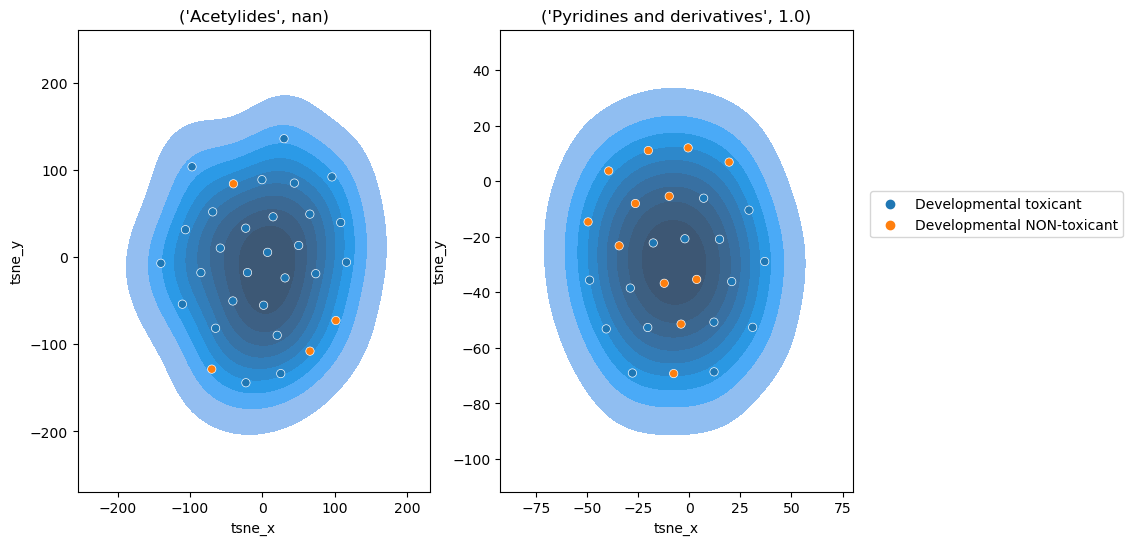

In [185]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,6))
plt.subplots_adjust(hspace = 0.8)
#colors = {1:'red', 0 : 'blue'}
ax1.title.set_text("('Acetylides', nan)")
ax2.title.set_text("('Pyridines and derivatives', 1.0)")
#grouped = tsne_df.groupby('Source')
#for key, group in grouped:
#    group.plot(ax=ax, kind='scatter', x='tsne_x', y='tsne_y', alpha = alphas[0], label=key, color=colors[key])
ax1 = sns.kdeplot(x="tsne_x", y="tsne_y", fill = True,
                     data=tsne_lst[0]['tsne'], ax = ax1)
ax1 = sns.scatterplot(x="tsne_x", y="tsne_y", hue = 'Pred_DevTox',
                     data=tsne_lst[0]['tsne'], ax = ax1)

ax2 = sns.kdeplot(x="tsne_x", y="tsne_y", fill = True,
                     data=tsne_lst[168]['tsne'], ax = ax2)
ax2 = sns.scatterplot(x="tsne_x", y="tsne_y", hue = 'Pred_DevTox',
                     data=tsne_lst[168]['tsne'], ax = ax2)
ax1.get_legend().remove()
handles, labels = ax2.get_legend_handles_labels()
print(labels)
#labels = ['Testing Track C', 'Testing Track A', 'Testing Track B', 'Testing Track D']
l = plt.legend(handles[0:5], labels[0:5], bbox_to_anchor=(1.05,0.65), loc=2, borderaxespad=0.)
fig.savefig(figures_dir+'Figure6.png', dpi = 300, bbox_inches = 'tight')

['Mutagenicity Positive', 'Mutagenicity Negative']


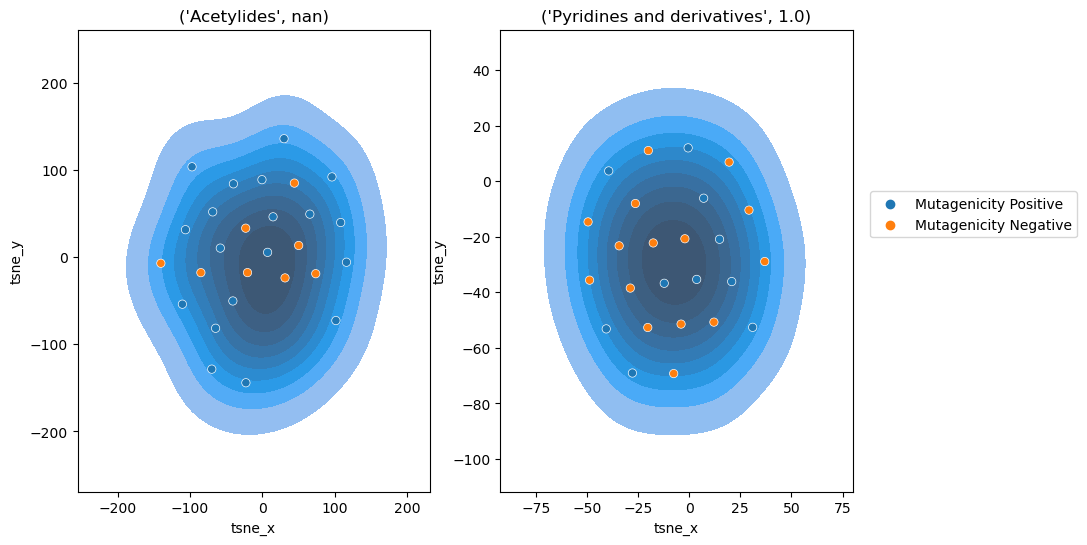

In [186]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,6))
plt.subplots_adjust(hspace = 0.8)
#colors = {1:'red', 0 : 'blue'}
ax1.title.set_text("('Acetylides', nan)")
ax2.title.set_text("('Pyridines and derivatives', 1.0)")
#grouped = tsne_df.groupby('Source')
#for key, group in grouped:
#    group.plot(ax=ax, kind='scatter', x='tsne_x', y='tsne_y', alpha = alphas[0], label=key, color=colors[key])
ax1 = sns.kdeplot(x="tsne_x", y="tsne_y", fill = True,
                     data=tsne_lst[0]['tsne'], ax = ax1)
ax1 = sns.scatterplot(x="tsne_x", y="tsne_y", hue = 'Pred_Ames',
                     data=tsne_lst[0]['tsne'], ax = ax1)

ax2 = sns.kdeplot(x="tsne_x", y="tsne_y", fill = True,
                     data=tsne_lst[168]['tsne'], ax = ax2)
ax2 = sns.scatterplot(x="tsne_x", y="tsne_y", hue = 'Pred_Ames',
                     data=tsne_lst[168]['tsne'], ax = ax2)
ax1.get_legend().remove()
handles, labels = ax2.get_legend_handles_labels()
print(labels)
#labels = ['Testing Track C', 'Testing Track A', 'Testing Track B', 'Testing Track D']
l = plt.legend(handles[0:5], labels[0:5], bbox_to_anchor=(1.05,0.65), loc=2, borderaxespad=0.)
fig.savefig(figures_dir+'Figure7.png', dpi = 300, bbox_inches = 'tight')

In [157]:
tsne_all = TSNE(learning_rate = 200, random_state = 42).fit_transform(mk_fp(tsca_set))

RDKit ERROR: [18:49:18] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [18:49:18] Explicit valence for atom # 4 O, 3, is greater than permitted
RDKit ERROR: [18:49:18] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [18:49:18] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [18:49:18] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [18:49:18] Explicit valence for atom # 10 N, 4, is greater than permitted
RDKit ERROR: [18:49:18] Explicit valence for atom # 8 O, 3, is greater than permitted
RDKit ERROR: [18:49:18] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [18:49:18] Explicit valence for atom # 8 O, 3, is greater than permitted
RDKit ERROR: [18:49:18] Explicit valence for atom # 8 O, 3, is greater than permitted
RDKit ERROR: [18:49:18] Explicit valence for atom # 0 O, 4, is greater than permitted
RDKit ERROR: [18:49:18] SMILES Parse Error: syntax er

In [160]:
tsne_all.shape

(14194, 2)

In [161]:
D_mgrn = mk_fp(tsca_set)

RDKit ERROR: [18:54:50] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [18:54:50] Explicit valence for atom # 4 O, 3, is greater than permitted
RDKit ERROR: [18:54:50] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [18:54:50] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [18:54:50] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [18:54:50] Explicit valence for atom # 10 N, 4, is greater than permitted
RDKit ERROR: [18:54:50] Explicit valence for atom # 8 O, 3, is greater than permitted
RDKit ERROR: [18:54:50] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [18:54:50] Explicit valence for atom # 8 O, 3, is greater than permitted
RDKit ERROR: [18:54:50] Explicit valence for atom # 8 O, 3, is greater than permitted
RDKit ERROR: [18:54:50] Explicit valence for atom # 0 O, 4, is greater than permitted
RDKit ERROR: [18:54:50] SMILES Parse Error: syntax er

In [163]:
tsne_all_df = pd.DataFrame(tsne_all, index = D_mgrn.index, columns = ['tsne_x', 'tsne_y'])

In [169]:
tsne_all_df = pd.concat([tsne_all_df, tsca_set1], axis = 1).dropna(subset = ['tsne_x'])

In [170]:
tsne_all_df

,tsne_x,tsne_y,smiles,group_str,final_picks,Molecule name,Pred_DevTox,Pred_Ames
DTXSID4063036,36.209377,-40.545303,CCCCCCCC#C,"('Acetylides', nan)",NaN,DTXSID4063036,Developmental toxicant,Mutagenicity Positive
DTXSID30870753,35.161121,-40.677715,CCCCC#C,"('Acetylides', nan)",NaN,DTXSID30870753,Developmental toxicant,Mutagenicity Positive
DTXSID7062374,34.579109,-39.849720,C#CCCCCCC#C,"('Acetylides', nan)",NaN,DTXSID7062374,Developmental toxicant,Mutagenicity Negative
DTXSID9061097,36.288994,-40.533955,CCCCCCCCCCCCCC#C,"('Acetylides', nan)",1.0,DTXSID9061097,Developmental toxicant,Mutagenicity Positive
DTXSID1061233,34.398335,-39.975872,C#CCCCCC#C,"('Acetylides', nan)",NaN,DTXSID1061233,Developmental toxicant,Mutagenicity Negative
...,...,...,...,...,...,...,...,...
DTXSID7070391,-60.617004,-36.805370,CC1=CC(=CC=C1N=NC1=C2C=CC=CC2=CC=C1O)C(C1=CC=C...,"('Triphenyl compounds', nan)",NaN,DTXSID7070391,NaN,Mutagenicity Positive
DTXSID70889405,3.814116,-9.234993,CC1=C(C=CC=C1N1CC(COC2=CC=C(C=C2)C(C2=CC=C(OCC...,"('Triphenyl compounds', nan)",1.0,NaN,NaN,NaN
DTXSID90886794,-66.648125,-11.900670,CC1=NN(C(=O)C1N=NC1=CC=C(C=C1C)C(C1=CC=CC=C1)C...,"('Triphenyl compounds', nan)",NaN,DTXSID90886794,NaN,Mutagenicity Negative
DTXSID3073052,-30.714920,-22.371298,CC(C)(C1=CC=C(O)C=C1)C1=CC=C(C=C1)C(C)(C1=CC=C...,"('Triphenyl compounds', nan)",NaN,DTXSID3073052,Developmental toxicant,Mutagenicity Negative


['Pred_Ames', 'Mutagenicity Positive', 'Mutagenicity Negative']


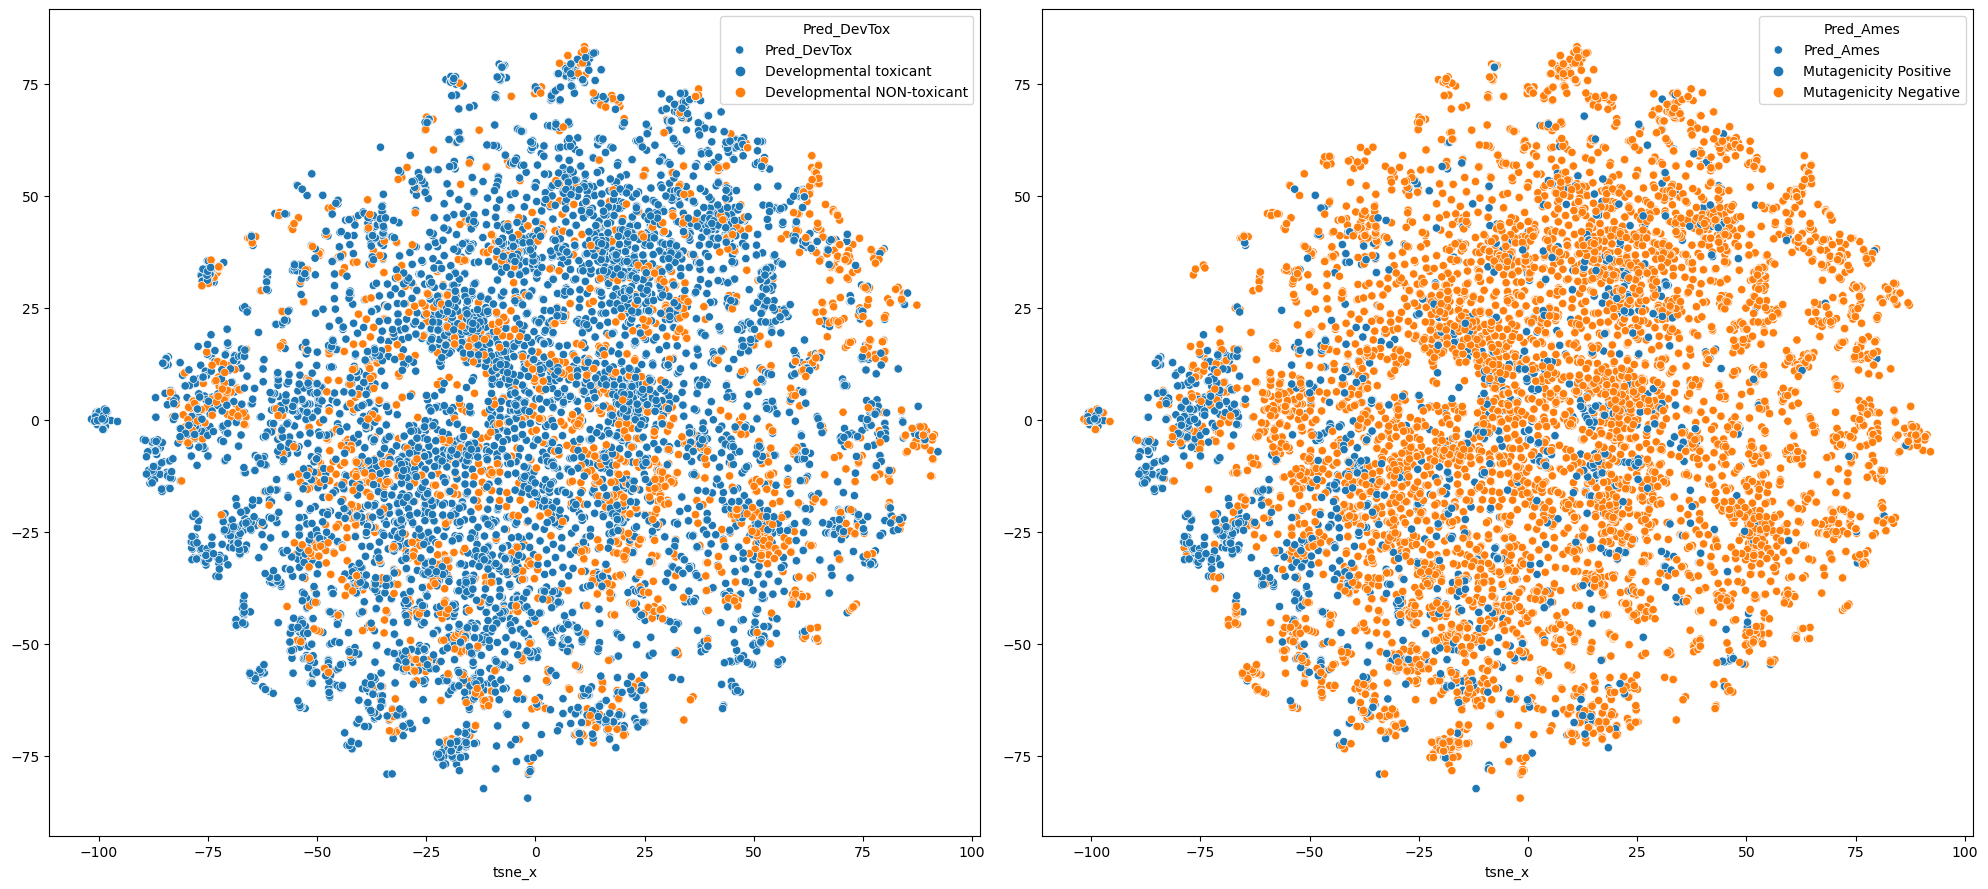

In [179]:


f = plt.figure(figsize = (20,9))
k=0
for n, e in enumerate( ['Pred_DevTox','Pred_Ames']):
    ax = plt.subplot(1,2, n+1)
    g = sns.scatterplot(x="tsne_x", y="tsne_y", data=tsne_all_df, hue = e, label = e)
    ax.set_ylabel("")
    #plt.subplots_adjust(hspace = 0.8)
handles, labels = ax.get_legend_handles_labels()
print(labels)
#l = plt.legend(handles[0:5], labels[0:5], bbox_to_anchor=(1.15,0.75), loc=2, borderaxespad=0.)
plt.tight_layout()
f.savefig(figures_dir+'Figure5.png', dpi = 300)

/home/grace/anaconda3/envs/pfas_dap/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/grace/anaconda3/envs/pfas_dap/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/grace/anaconda3/envs/pfas_dap/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

[<BarContainer object of 2 artists>, <BarContainer object of 2 artists>]


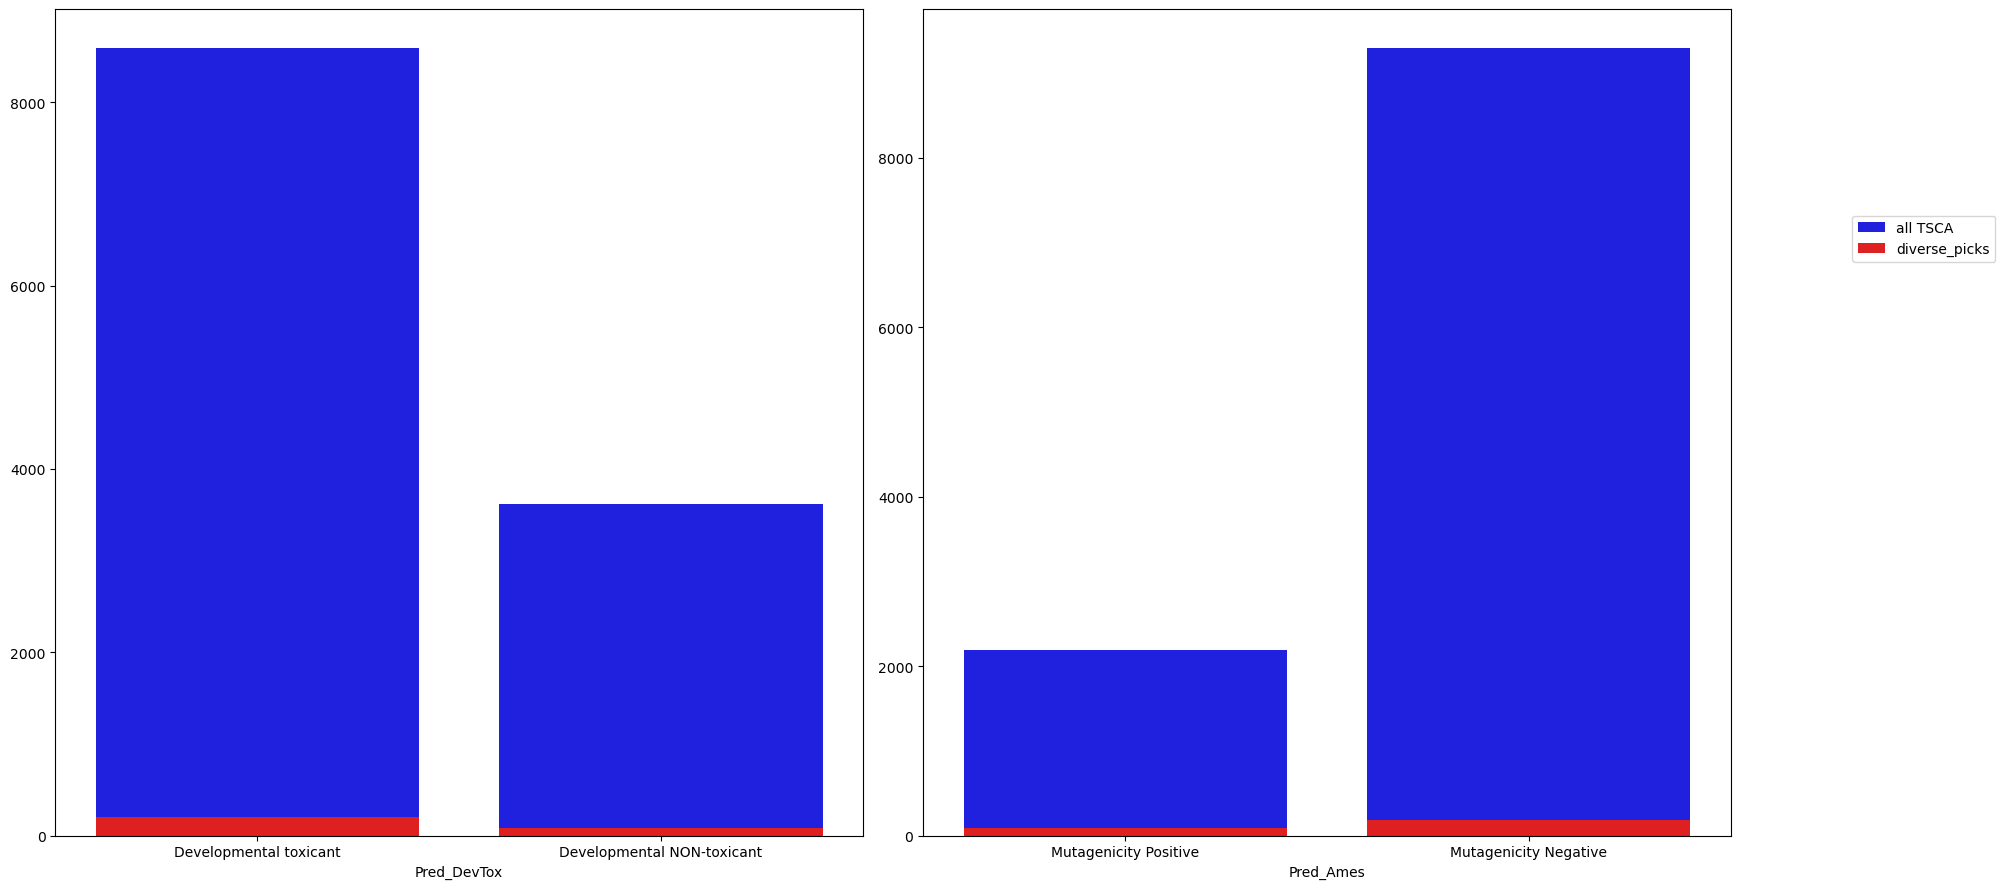

In [174]:
f = plt.figure(figsize = (20,9))
k=0
for n, e in enumerate( ['Pred_DevTox','Pred_Ames']):
    ax = plt.subplot(1,2, n+1)
    g = sns.countplot(tsne_all_df[e], color = 'b', ax = ax, label = 'all TSCA')
    g = sns.countplot(tsne_all_df[tsne_all_df['final_picks']==1][e], color = 'r', ax = ax, label = 'diverse_picks')
    ax.set_ylabel("")
    #plt.subplots_adjust(hspace = 0.8)
handles, labels = ax.get_legend_handles_labels()
print(handles)
l = plt.legend(handles[0:5], labels[0:5], bbox_to_anchor=(1.15,0.75), loc=2, borderaxespad=0.)
plt.tight_layout()
f.savefig(figures_dir+'Figure4.png', dpi = 300)

In [187]:
import pickle
pickle.dump( tsne_lst, open(interim_dir+ "tsne_lst_140423.pkl", "wb" ) )